# Prepare

In [37]:
# Link to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import Pkg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [39]:
# Load Dataset
df = pd.read_csv('/content/drive/My Drive/INF2178/A3/INF2178_A3_data.csv')

In [40]:
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [42]:
df['fall_total_score'] = df['fallreadingscore'] + df['fallmathscore'] + df['fallgeneralknowledgescore']
df['spring_total_score'] = df['springreadingscore'] + df['springmathscore'] + df['springgeneralknowledgescore']


# EDA

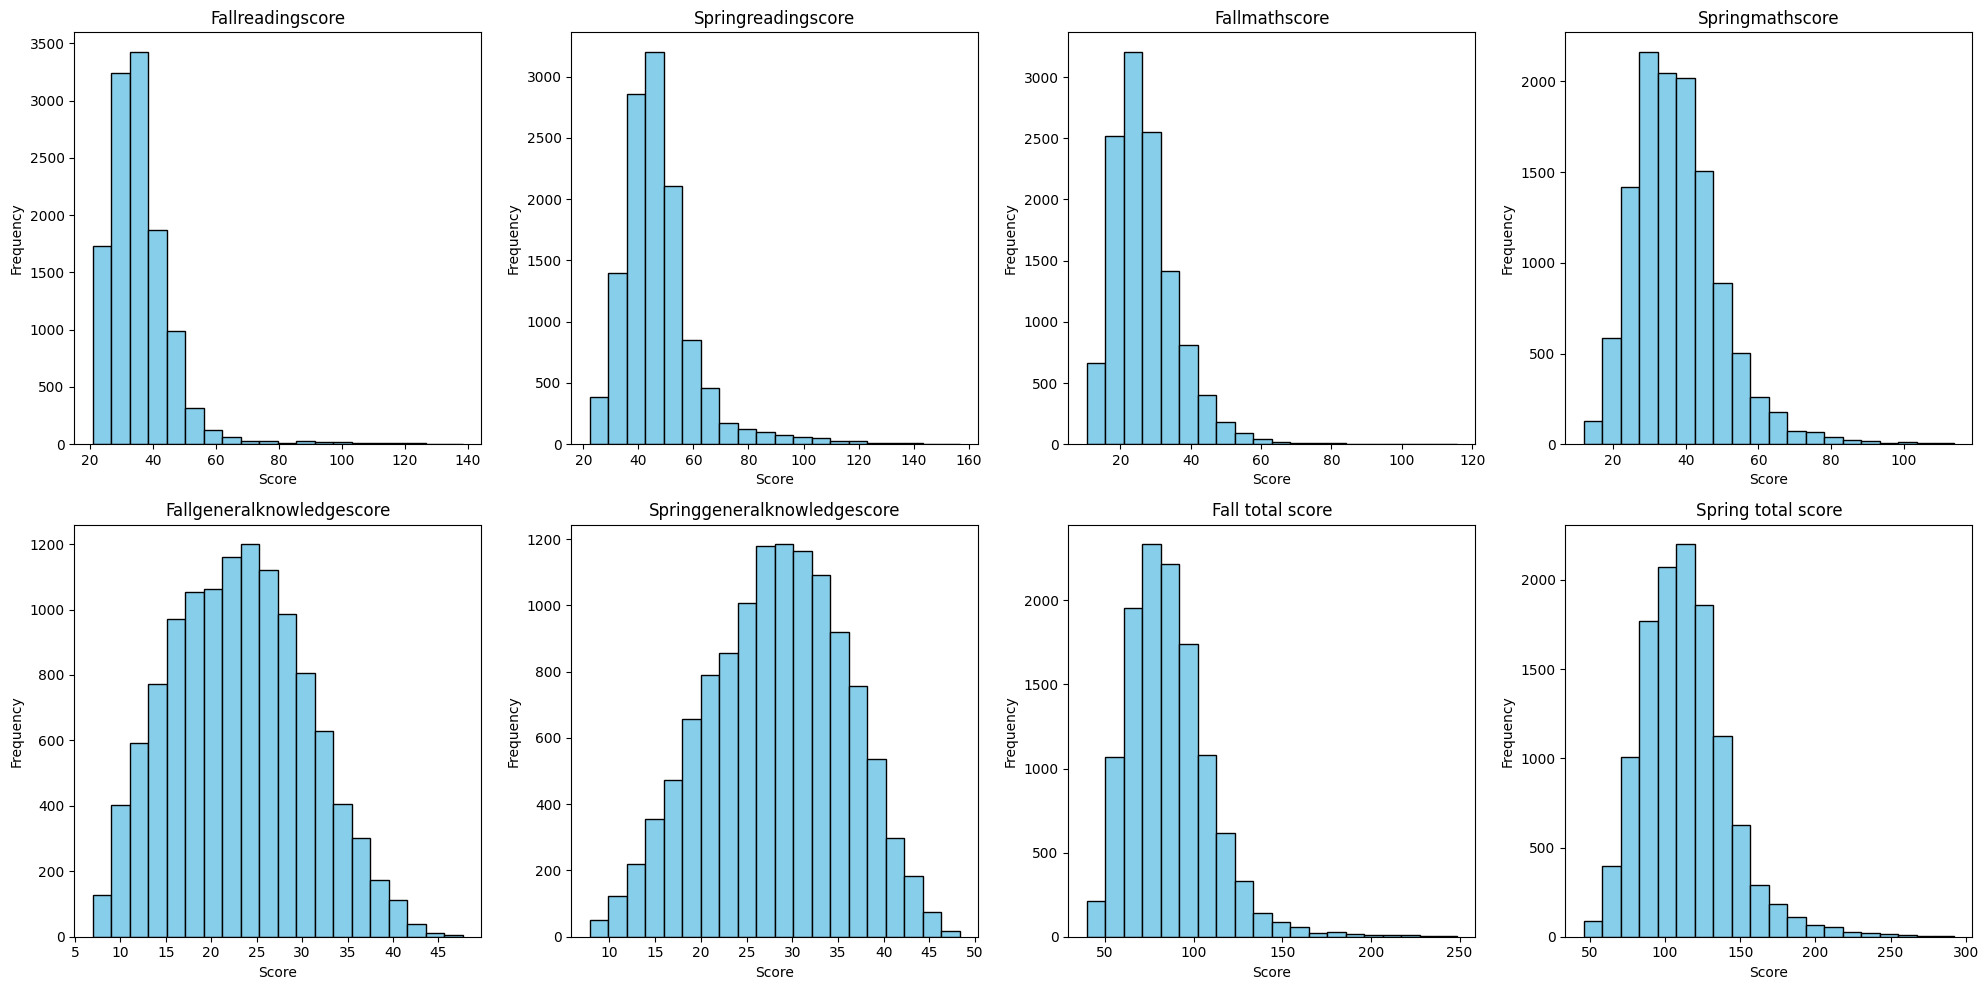

In [43]:
columns = ['fallreadingscore', 'springreadingscore',
           'fallmathscore', 'springmathscore',
           'fallgeneralknowledgescore', 'springgeneralknowledgescore',
           'fall_total_score', 'spring_total_score']

# Create a subplot layout of 2 rows by 4 columns
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Iterate through all columns to plot histograms
for ax, col in zip(axs.flat, columns):
    # Plot a histogram for each column of scores on its respective axis
    df[col].plot(kind='hist', bins=20, ax=ax,
                 title=col.replace('_', ' ').capitalize(),
                 color='skyblue', edgecolor='black')
    # Set x-axis label as 'Score'
    ax.set_xlabel('Score')
    # Set y-axis label as 'Frequency'
    ax.set_ylabel('Frequency')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the figure with all the histograms
plt.show()



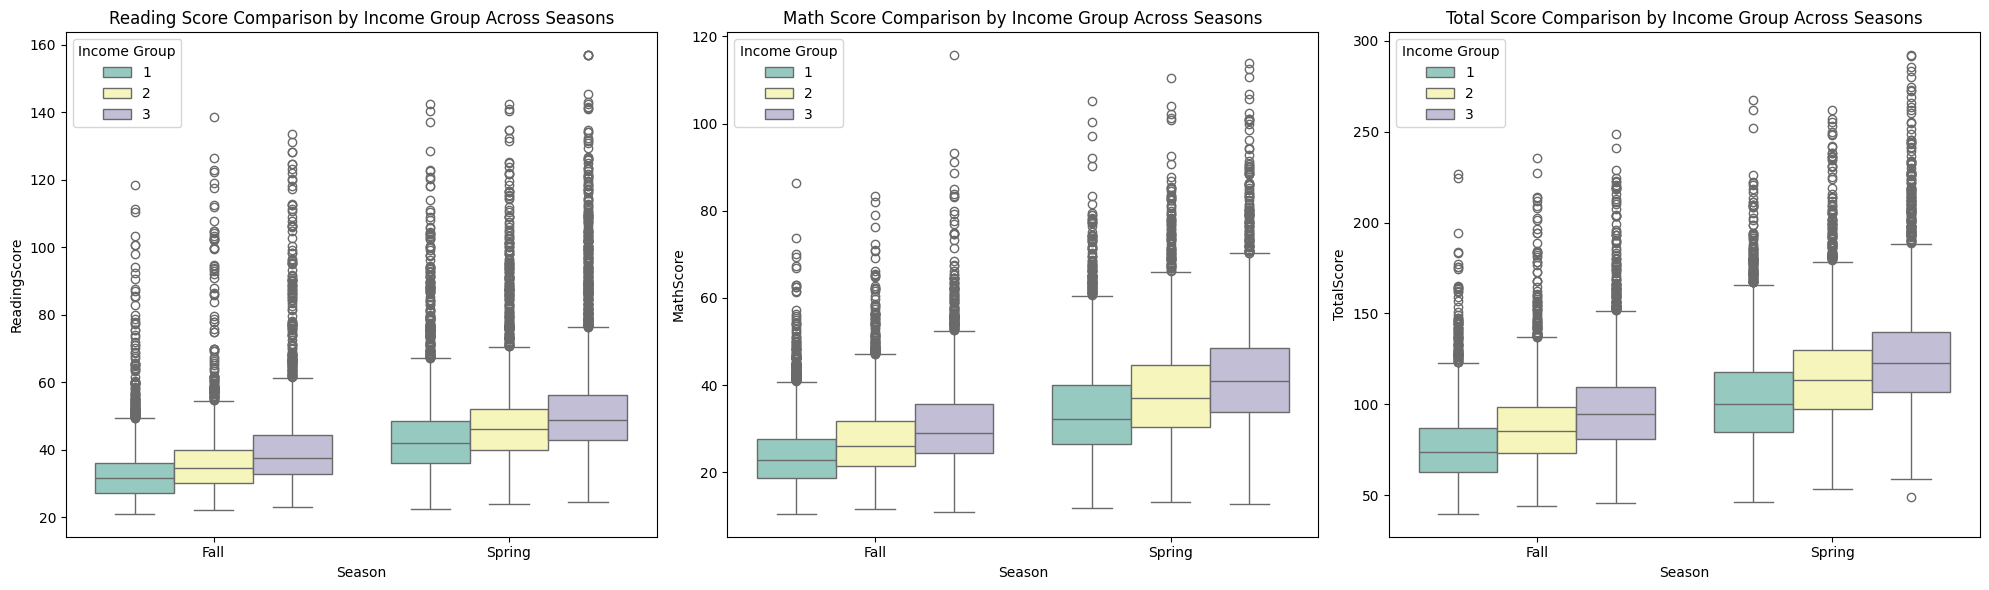

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))


# Prepare data and draw the reading score box plot
fall_read = df[['incomegroup', 'fallreadingscore']].copy()
spring_read = df[['incomegroup', 'springreadingscore']].copy()
fall_read['Season'] = 'Fall'
spring_read['Season'] = 'Spring'
fall_read.rename(columns={'fallreadingscore': 'ReadingScore'}, inplace=True)
spring_read.rename(columns={'springreadingscore': 'ReadingScore'}, inplace=True)
reading_scores = pd.concat([fall_read, spring_read])
sns.boxplot(x='Season', y='ReadingScore', hue='incomegroup', data=reading_scores, palette='Set3', ax=axs[0])
axs[0].set_title('Reading Score Comparison by Income Group Across Seasons')

# Prepare data and draw the math score box plot
fall_math = df[['incomegroup', 'fallmathscore']].copy()
spring_math = df[['incomegroup', 'springmathscore']].copy()
fall_math['Season'] = 'Fall'
spring_math['Season'] = 'Spring'
fall_math.rename(columns={'fallmathscore': 'MathScore'}, inplace=True)
spring_math.rename(columns={'springmathscore': 'MathScore'}, inplace=True)
math_scores = pd.concat([fall_math, spring_math])
sns.boxplot(x='Season', y='MathScore', hue='incomegroup', data=math_scores, palette='Set3', ax=axs[1])
axs[1].set_title('Math Score Comparison by Income Group Across Seasons')

# Prepare data and draw the total score box plot
fall_total = df[['incomegroup', 'fall_total_score']].copy()
spring_total = df[['incomegroup', 'spring_total_score']].copy()
fall_total['Season'] = 'Fall'
spring_total['Season'] = 'Spring'
fall_total.rename(columns={'fall_total_score': 'TotalScore'}, inplace=True)
spring_total.rename(columns={'spring_total_score': 'TotalScore'}, inplace=True)
total_scores = pd.concat([fall_total, spring_total])
sns.boxplot(x='Season', y='TotalScore', hue='incomegroup', data=total_scores, palette='Set3', ax=axs[2])
axs[2].set_title('Total Score Comparison by Income Group Across Seasons')

# Adjust the legend position for each subplot
for ax in axs:
    ax.legend(title='Income Group', loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


# Research Question 1

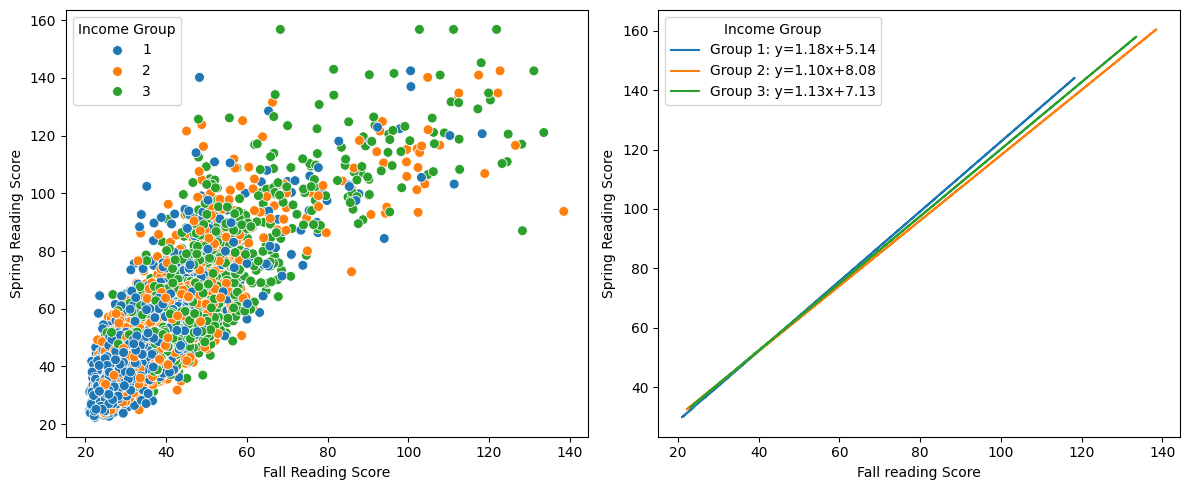

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Spring Total Score vs. Fall Total Score, colored by income group
sns.scatterplot(data=df, x='fallreadingscore', y='springreadingscore', hue='incomegroup', hue_order=[1, 2, 3], ax=axs[0], s=50, palette="tab10")

# Draw regression lines for each income group
for i in range(1, 4):
    x = df[df["incomegroup"] == i]['fallreadingscore']
    y = df[df["incomegroup"] == i]['springreadingscore']
    # Fit the linear regression line
    line = sm.OLS(y, sm.add_constant(x)).fit()
    # Retrieve the slope and intercept
    const, coef = line.params
    # Plot the line
    y_pred = const + coef * x
    axs[1].plot(x, y_pred, label=f"Group {i}: y={coef:.2f}x+{const:.2f}")

# Set labels and legends for both subplots
axs[0].set_xlabel('Fall Reading Score')
axs[0].set_ylabel('Spring Reading Score')
axs[0].legend(title="Income Group")
axs[1].set_xlabel('Fall reading Score')
axs[1].set_ylabel('Spring Reading Score')
axs[1].legend(title="Income Group")

plt.tight_layout()
plt.show()

In [46]:
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
# Fit ANCOVA Model
ancova_model1 = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=df).fit()

# Display ANCOVA Result
ancova_results = sm.stats.anova_lm(ancova_model1, typ=2)
ancova_results


,sum_sq,df,F,PR(>F)
C(incomegroup),5.131201e+02,2.0,4.055660,0.017348
fallreadingscore,1.547042e+06,1.0,24455.397576,0.000000
Residual,7.546256e+05,11929.0,NaN,NaN


After controlling for family income, is there a significant difference in the change in reading scores in the spring compared to the fall for students in different income groups?

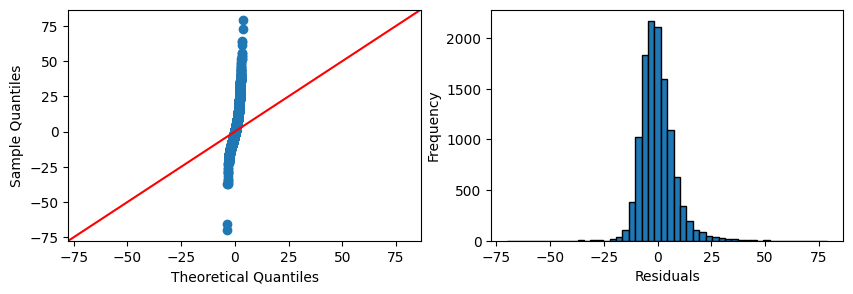

Shapiro Wilk test results: 
0.9119972586631775 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [47]:
 from scipy.stats import shapiro
 # assumption 1: residuals are normally distributed
 # qq-plot
 fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 sm.qqplot(ancova_model1.resid, line='45', ax=axs[0])
 plt.xlabel("Theoretical Quantiles")
 plt.ylabel("Standardized Residuals")
 # plt.show()

 # histogram
 axs[1].hist(ancova_model1.resid, bins=50, histtype='bar', ec='k')
 plt.xlabel("Residuals")
 plt.ylabel('Frequency')
 plt.show()

w, pvalue = shapiro(ancova_model1.resid)
print("Shapiro Wilk test results: ")
print(w, pvalue)


In [48]:
from scipy.stats import levene

df['residuals'] = ancova_model1.resid
groups = df.groupby('incomegroup')['residuals'].apply(list)

# Perform Levene's test using the residuals grouped by 'incomegroup'
stat, pvalue = levene(*groups)
print(f"Levene's test statistic: {stat}, p-value: {pvalue}")


Levene's test statistic: 23.346164305668495, p-value: 7.597654999087453e-11


# Research Question 2

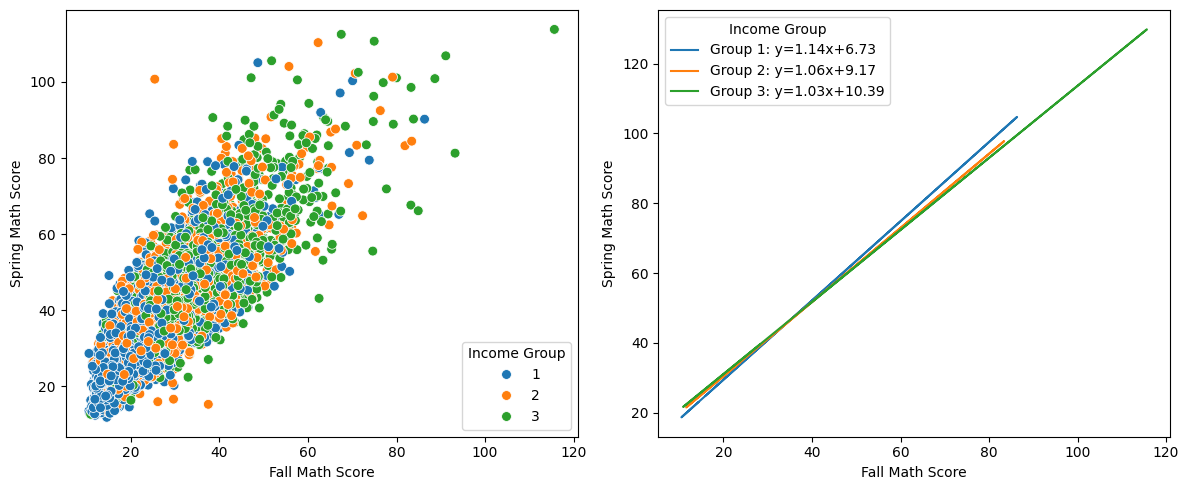

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Spring Total Score vs. Fall Total Score, colored by income group
sns.scatterplot(data=df, x='fallmathscore', y='springmathscore', hue='incomegroup', hue_order=[1, 2, 3], ax=axs[0], s=50, palette="tab10")

# Draw regression lines for each income group
for i in range(1, 4):
    x = df[df["incomegroup"] == i]['fallmathscore']
    y = df[df["incomegroup"] == i]['springmathscore']
    # Fit the linear regression line
    line = sm.OLS(y, sm.add_constant(x)).fit()
    # Retrieve the slope and intercept
    const, coef = line.params
    # Plot the line
    y_pred = const + coef * x
    axs[1].plot(x, y_pred, label=f"Group {i}: y={coef:.2f}x+{const:.2f}")

# Set labels and legends for both subplots
axs[0].set_xlabel('Fall Math Score')
axs[0].set_ylabel('Spring Math Score')
axs[0].legend(title="Income Group")
axs[1].set_xlabel('Fall Math Score')
axs[1].set_ylabel('Spring Math Score')
axs[1].legend(title="Income Group")

plt.tight_layout()
plt.show()

In [50]:
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
# Fit ANCOVA Model
ancova_model2 = ols('springmathscore ~ C(incomegroup) + fallmathscore', data=df).fit()

# Display ANCOVA Result
ancova3_results = sm.stats.anova_lm(ancova_model2, typ=2)
ancova3_results


,sum_sq,df,F,PR(>F)
C(incomegroup),1.712758e+03,2.0,18.523585,9.284861e-09
fallmathscore,1.026489e+06,1.0,22203.081238,0.000000e+00
Residual,5.514994e+05,11929.0,NaN,NaN


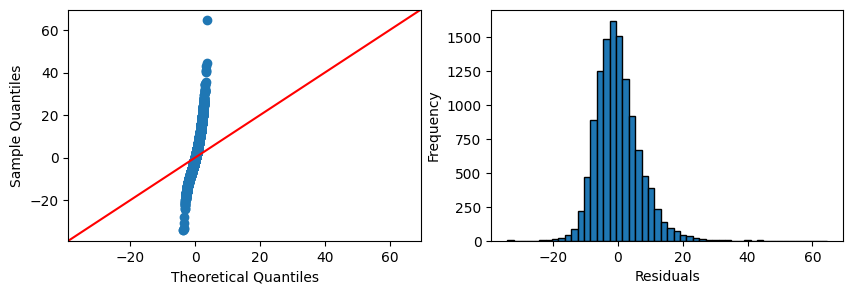

Shapiro Wilk test results: 
0.9649319052696228 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
 from scipy.stats import shapiro
 # assumption 1: residuals are normally distributed
 # qq-plot
 fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 sm.qqplot(ancova_model2.resid, line='45', ax=axs[0])
 plt.xlabel("Theoretical Quantiles")
 plt.ylabel("Standardized Residuals")
 # plt.show()

 # histogram
 axs[1].hist(ancova_model2.resid, bins=50, histtype='bar', ec='k')
 plt.xlabel("Residuals")
 plt.ylabel('Frequency')
 plt.show()

w, pvalue = shapiro(ancova_model2.resid)
print("Shapiro Wilk test results: ")
print(w, pvalue)

In [52]:
from scipy.stats import levene

df['anova2_residuals'] = ancova_model2.resid
groups = df.groupby('incomegroup')['anova2_residuals'].apply(list)

# Perform Levene's test using the residuals grouped by 'incomegroup'
stat, pvalue = levene(*groups)
print(f"Levene's test statistic: {stat}, p-value: {pvalue}")


Levene's test statistic: 26.948126577906194, p-value: 2.103460198962261e-12


# Research Question 3



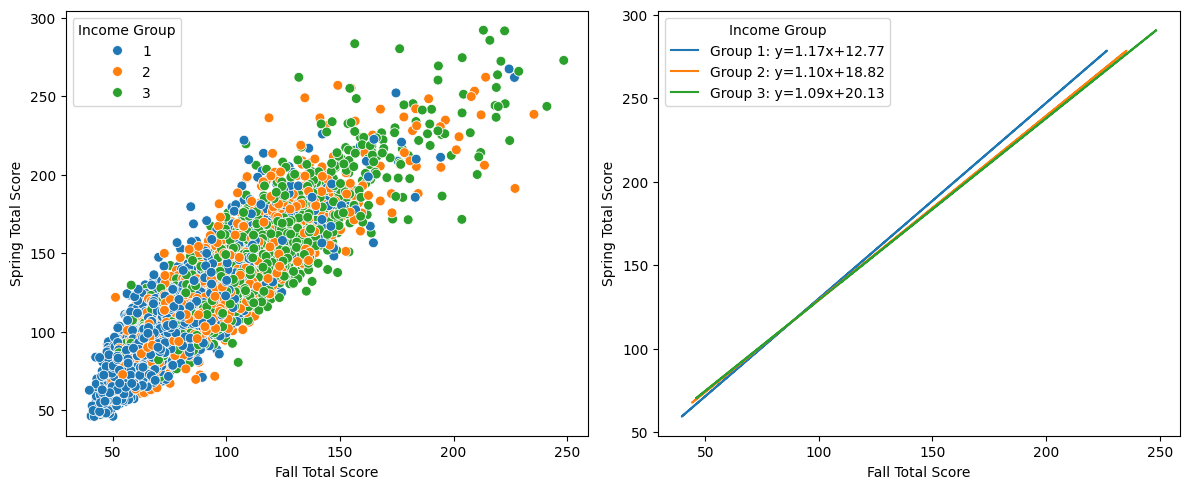

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Spring Total Score vs. Fall Total Score, colored by income group
sns.scatterplot(data=df, x='fall_total_score', y='spring_total_score', hue='incomegroup', hue_order=[1, 2, 3], ax=axs[0], s=50, palette="tab10")

# Draw regression lines for each income group
for i in range(1, 4):
    x = df[df["incomegroup"] == i]['fall_total_score']
    y = df[df["incomegroup"] == i]['spring_total_score']
    # Fit the linear regression line
    line = sm.OLS(y, sm.add_constant(x)).fit()
    # Retrieve the slope and intercept
    const, coef = line.params
    # Plot the line
    y_pred = const + coef * x
    axs[1].plot(x, y_pred, label=f"Group {i}: y={coef:.2f}x+{const:.2f}")

# Set labels and legends for both subplots
axs[0].set_xlabel('Fall Total Score')
axs[0].set_ylabel('Spring Total Score')
axs[0].legend(title="Income Group")
axs[1].set_xlabel('Fall Total Score')
axs[1].set_ylabel('Spring Total Score')
axs[1].legend(title="Income Group")

plt.tight_layout()
plt.show()

In [54]:
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
# Fit ANCOVA Model
ancova_model3 = ols('spring_total_score ~ C(incomegroup) + fall_total_score', data=df).fit()

# Display ANCOVA Result
ancova3_results = sm.stats.anova_lm(ancova_model3, typ=2)
ancova3_results


,sum_sq,df,F,PR(>F)
C(incomegroup),7.012567e+02,2.0,2.054860,0.128156
fall_total_score,6.976113e+06,1.0,40883.557448,0.000000
Residual,2.035489e+06,11929.0,NaN,NaN


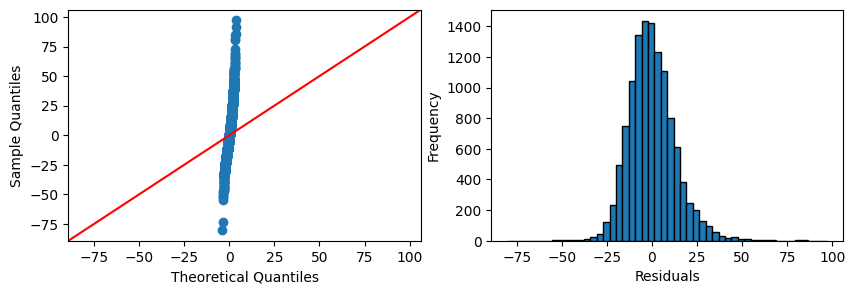

Shapiro Wilk test results: 
0.9715154767036438 3.1809475140173348e-43


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [55]:
 from scipy.stats import shapiro
 # assumption 1: residuals are normally distributed
 # qq-plot
 fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
 sm.qqplot(ancova_model3.resid, line='45', ax=axs[0])
 plt.xlabel("Theoretical Quantiles")
 plt.ylabel("Standardized Residuals")
 # plt.show()

 # histogram
 axs[1].hist(ancova_model3.resid, bins=50, histtype='bar', ec='k')
 plt.xlabel("Residuals")
 plt.ylabel('Frequency')
 plt.show()

w, pvalue = shapiro(ancova_model3.resid)
print("Shapiro Wilk test results: ")
print(w, pvalue)

In [56]:
from scipy.stats import levene

df['anova3_residuals'] = ancova_model3.resid
groups = df.groupby('incomegroup')['anova3_residuals'].apply(list)

# Perform Levene's test using the residuals grouped by 'incomegroup'
stat, pvalue = levene(*groups)
print(f"Levene's test statistic: {stat}, p-value: {pvalue}")


Levene's test statistic: 11.5171054569239, p-value: 1.0069482460658433e-05
